In [1]:
import pandas as pd

# Load the ratings data
ratings_df = pd.read_csv('/content/ratings.csv')

# Get the number of unique user IDs
unique_users = ratings_df['userId'].nunique()

print(unique_users)


610


In [2]:
# Load the ratings data
ratings_df = pd.read_csv('/content/ratings.csv')
# Count the number of ratings for each movie
ratings_count = ratings_df.groupby('movieId').size()
# Find the movie with the maximum number of ratings
most_rated_movie_id = ratings_count.idxmax()
most_rated_movie_count = ratings_count.max()
# Load the movies data to get movie details
movies_df = pd.read_csv('movies.csv')

# Find the movie title for the most rated movie
most_rated_movie_title = movies_df[movies_df['movieId'] == most_rated_movie_id]['title'].values[0]

print(f"Movie with maximum number of ratings: {most_rated_movie_title} ({most_rated_movie_id}) with {most_rated_movie_count} ratings")


Movie with maximum number of ratings: Forrest Gump (1994) (356) with 329 ratings


In [3]:
import pandas as pd
# Load the movies and tags data
movies_df = pd.read_csv('/content/movies.csv')
tags_df = pd.read_csv('tags.csv')
# Find the movie ID for "Matrix, The (1999)"
matrix_movie_id = movies_df[movies_df['title'] == 'Matrix, The (1999)']['movieId'].values[0]
# Filter the tags for the movie
matrix_tags = tags_df[tags_df['movieId'] == matrix_movie_id]
# Get the unique tags
unique_tags = matrix_tags['tag'].unique()
print("Tags for 'Matrix, The (1999)':")
for tag in unique_tags:
    print(tag)


Tags for 'Matrix, The (1999)':
martial arts
sci-fi
alternate universe
philosophy
post apocalyptic


In [4]:
# Load the data
movies_df = pd.read_csv('/content/movies.csv')
ratings_df = pd.read_csv('/content/ratings.csv')
# Find the movie ID for "Terminator 2: Judgment Day (1991)"
terminator_movie_id = movies_df[movies_df['title'] == 'Terminator 2: Judgment Day (1991)']['movieId'].values[0]
# Filter the ratings for the movie
terminator_ratings = ratings_df[ratings_df['movieId'] == terminator_movie_id]
# Calculate the average rating
average_rating = terminator_ratings['rating'].mean()

print(f"The average user rating for 'Terminator 2: Judgment Day (1991)' is {average_rating:.2f}")


The average user rating for 'Terminator 2: Judgment Day (1991)' is 3.97


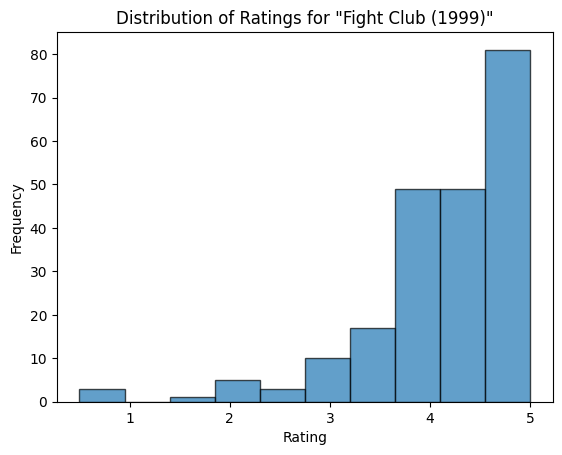

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
movies_df = pd.read_csv('movies.csv')
ratings_df = pd.read_csv('ratings.csv')
fight_club_movie_id = movies_df[movies_df['title'] == 'Fight Club (1999)']['movieId'].values[0]
# Filter the ratings
fight_club_ratings = ratings_df[ratings_df['movieId'] == fight_club_movie_id]
# Plot the distribution
plt.hist(fight_club_ratings['rating'], bins=10, edgecolor='k', alpha=0.7)
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Ratings for "Fight Club (1999)"')
plt.show()


In [6]:
import pandas as pd

# Load the data
movies_df = pd.read_csv('movies.csv')
ratings_df = pd.read_csv('ratings.csv')

# Group ratings by movieId and calculate count and mean
grouped_ratings = ratings_df.groupby('movieId').agg({'rating': ['count', 'mean']})
grouped_ratings.columns = ['rating_count', 'average_rating']

# Filter movies with more than 50 ratings
filtered_ratings = grouped_ratings[grouped_ratings['rating_count'] > 50]

# Reset index for merging
filtered_ratings.reset_index(inplace=True)

# Inner join with movies dataframe to get movie titles
merged_df = pd.merge(filtered_ratings, movies_df, on='movieId')

# Find the movie with the highest average rating
most_popular_movie = merged_df.loc[merged_df['average_rating'].idxmax()]

print(f"The most popular movie based on average user ratings is: {most_popular_movie['title']}")


The most popular movie based on average user ratings is: Shawshank Redemption, The (1994)


In [7]:
import pandas as pd

# Load the data
movies_df = pd.read_csv('movies.csv')
ratings_df = pd.read_csv('ratings.csv')

# Group ratings by movieId and calculate count and mean
grouped_ratings = ratings_df.groupby('movieId').agg({'rating': ['count', 'mean']})
grouped_ratings.columns = ['rating_count', 'average_rating']

# Filter movies with more than 50 ratings
filtered_ratings = grouped_ratings[grouped_ratings['rating_count'] > 50]

# Reset index for merging
filtered_ratings.reset_index(inplace=True)

# Inner join with movies dataframe to get movie titles
merged_df = pd.merge(filtered_ratings, movies_df, on='movieId')

# Sort by rating_count in descending order and select top 5
top_5_movies = merged_df.sort_values(by='rating_count', ascending=False).head(5)

# Print top 5 movies
print(top_5_movies[['title', 'rating_count']])


                                title  rating_count
61                Forrest Gump (1994)           329
53   Shawshank Redemption, The (1994)           317
49                Pulp Fiction (1994)           307
99   Silence of the Lambs, The (1991)           279
248                Matrix, The (1999)           278


In [8]:
import pandas as pd

# Load the data
movies_df = pd.read_csv('movies.csv')
ratings_df = pd.read_csv('ratings.csv')
# Group ratings by movieId and calculate count and mean
grouped_ratings = ratings_df.groupby('movieId').agg({'rating': ['count', 'mean']})
grouped_ratings.columns = ['rating_count', 'average_rating']
# Filter movies with more than 50 ratings
filtered_ratings = grouped_ratings[grouped_ratings['rating_count'] > 50]
# Reset index for merging
filtered_ratings.reset_index(inplace=True)
# Inner join with movies dataframe
merged_df = pd.merge(filtered_ratings, movies_df, on='movieId')
# Filter Sci-Fi movies
sci_fi_movies = merged_df[merged_df['genres'].str.contains('Sci-Fi')]
# Sort by rating_count in descending order
third_most_popular_sci_fi = sci_fi_movies.sort_values(by='rating_count', ascending=False).iloc[2]
print(f"The third most popular Sci-Fi movie based on the number of user ratings is: {third_most_popular_sci_fi['title']}")


The third most popular Sci-Fi movie based on the number of user ratings is: Jurassic Park (1993)


In [12]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
# Load the links data
links_df = pd.read_csv('links.csv')
# Dictionary to store IMDb
imdb_ratings = {}
# Function to scrape
def get_imdb_rating(imdb_id):
    url = f'https://www.imdb.com/title/{imdb_id}/'
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'html.parser')
    rating_tag = soup.find('span', itemprop='ratingValue')
    if rating_tag:
        return float(rating_tag.text)
    return None
# Iterate through the links
for index, row in links_df.iterrows():
    imdb_id = row['imdbId']
    rating = get_imdb_rating(imdb_id)
    if rating:
        imdb_ratings[row['movieId']] = rating
# Save the IMDb ratings
ratings_df = pd.DataFrame(list(imdb_ratings.items()), columns=['movieId', 'imdb_rating'])
# Load movies
movies_df = pd.read_csv('movies.csv')
# Merge IMDb
merged_df = pd.merge(movies_df, ratings_df, on='movieId')
highest_rated_movie = merged_df.loc[merged_df['imdb_rating'].idxmax()]
highest_imdb_movie_id = highest_rated_movie['movieId']

print(f"The movieId of the movie with the highest IMDb rating is: {highest_imdb_movie_id}")


KeyboardInterrupt: 

In [ ]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

# Load the data
filtered_movies_df = pd.read_csv('movies.csv')  # Movies with more than 50 ratings
links_df = pd.read_csv('links.csv')
def get_imdb_rating(imdb_id):
    url = f'https://www.imdb.com/title/{imdb_id}/'
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'html.parser')
    rating_tag = soup.find('span', itemprop='ratingValue')
    if rating_tag:
        return float(rating_tag.text)
    return None
# Scrape IMDb ratings for each movie
imdb_ratings = {}
for index, row in links_df.iterrows():
    imdb_id = row['imdbId']
    rating = get_imdb_rating(imdb_id)
    if rating:
        imdb_ratings[row['movieId']] = rating
# Create a DataFrame
ratings_df = pd.DataFrame(list(imdb_ratings.items()), columns=['movieId', 'imdb_rating'])
# Merge IMDb ratings
merged_df = pd.merge(filtered_movies_df, ratings_df, on='movieId')
# Filter for Sci-Fi
sci_fi_movies = merged_df[merged_df['genres'].str.contains('Sci-Fi')]
highest_rated_sci_fi = sci_fi_movies.loc[sci_fi_movies['imdb_rating'].idxmax()]
highest_imdb_movie_id = highest_rated_sci_fi['movieId']

print(f"The movieId of the Sci-Fi movie with the highest IMDb rating is: {highest_imdb_movie_id}")
